In [108]:
def printMismatchedData(train_predict,train_target,train_data):
    counter = int(0);
    index_list = [];
    for index in range(len(train_predict)):
        if (train_predict[index] != train_target[index]) | (np.isnan(train_predict[index])) | (np.isnan(train_target[index])):
            print("Originl :" + str(train_target[index]) + " Predict :" + str(train_predict[index]))
            index_list.append(index)
            counter += 1
    
    # Accuracy rate
    print("Accurancy rate : " + str(int(1)- counter/len(train_predict)))
    
    # Draw
    draw2Images(index_list,train_data)

In [109]:
def draw2Images(index_list,train_data):
    for i in [0,1]:
        plt.imshow(train_data.iloc[index_list[i],:].as_matrix().reshape(28,28), cmap=cm.binary)
        plt.imshow(train_data.iloc[index_list[i],:].as_matrix().reshape(28,28), cmap=cm.binary)
        plt.show()

Originl :4 Predict :2
Originl :5 Predict :6
Originl :9 Predict :3
Originl :4 Predict :2
Originl :3 Predict :5
Originl :1 Predict :6
Originl :1 Predict :8
Originl :8 Predict :5
Originl :0 Predict :8
Originl :2 Predict :3
Originl :3 Predict :8
Originl :6 Predict :2
Originl :7 Predict :9
Originl :9 Predict :3
Originl :5 Predict :2
Originl :6 Predict :2
Originl :8 Predict :9
Originl :6 Predict :8
Originl :0 Predict :3
Originl :9 Predict :8
Originl :4 Predict :9
Originl :3 Predict :2
Originl :5 Predict :8
Originl :4 Predict :8
Originl :7 Predict :4
Originl :8 Predict :2
Originl :3 Predict :7
Originl :6 Predict :8
Originl :4 Predict :2
Originl :5 Predict :1
Originl :7 Predict :9
Originl :9 Predict :4
Originl :3 Predict :2
Originl :5 Predict :3
Originl :0 Predict :2
Originl :4 Predict :9
Originl :9 Predict :4
Originl :5 Predict :6
Originl :6 Predict :2
Originl :5 Predict :3
Originl :9 Predict :2
Originl :2 Predict :8
Originl :8 Predict :3
Originl :5 Predict :3
Originl :7 Predict :9
Originl :6

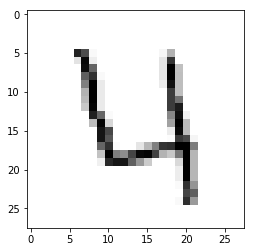

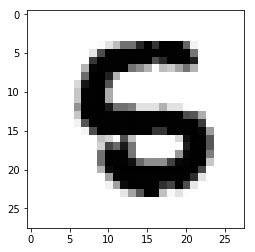

Wall time: 13.2 s


In [110]:
%%time
import pandas as pd 
from sklearn import linear_model
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from numpy import genfromtxt,savetxt

test_dataset = pd.read_csv("../datasets/digit/test.csv")
train_dataset = pd.read_csv("../datasets/digit/train.csv")
train_target = train_dataset.iloc[:,0] # label
train_data = train_dataset.iloc[:,1:] # pixels

# train
clf = linear_model.SGDClassifier()
clf.fit(train_data,train_target)

# predict
train_predict = clf.predict(train_data)

#print error rate
printMismatchedData(train_predict,train_target,train_data)

# predict test data
rs = clf.predict(test_dataset)

# format result
sm = pd.DataFrame({'ImageId': range(1, len(rs) + 1), 'Label':rs})

#save result
sm.to_csv('mine_submission.csv',index=False)